In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Tabular data

In [1]:
dt = pd.read_csv("GRID_data.csv"); dt

NameError: name 'pd' is not defined

In [3]:
dt_idx = dt[["area_veg", "NDVI"] + ["ch_%d" % i for i in range(1, 7)]].dropna(); dt_idx

,area_veg,NDVI,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6
0,6205,0.680722,32.572442,59.423529,26.239484,167.117808,69.889927,30.540088
1,6074,0.676454,32.683240,59.718966,26.431841,165.603721,69.595324,26.050244
2,8037,0.679914,32.748165,60.750404,26.750280,167.954585,69.989051,31.216141
3,5435,0.643977,36.915731,65.185097,28.936155,166.668813,68.871757,20.444095
4,5645,0.659209,35.175554,62.443933,27.421612,166.453853,69.195748,17.890222
...,...,...,...,...,...,...,...,...
271,6455,0.743537,26.120372,44.106274,20.407901,173.637180,72.545778,38.396902
272,6293,0.735538,27.076593,44.571746,21.143334,172.578738,72.617670,34.843954
273,7028,0.751853,25.338788,43.526323,20.231929,175.287137,74.050370,40.409932
274,6433,0.734485,27.561324,45.554018,21.560547,174.559304,73.487331,44.907508


In [5]:
dt_results = pd.DataFrame(columns=["x0", "x1", "form", "r2"])
ls_forms = ["a", "b", "c"]
p = 2 # number of columns are not loopable
m = 6 # number of columns we'd like to loop over
for i in range(m):
    for j in range(m):
        x0 = dt_idx.iloc[:, p + i]
        x1 = dt_idx.iloc[:, p + j]
        idxs = [(x0 - x1) / (x0 + x1),
                (x0 ** 2) + (x1 ** 2),
                x0 / x1]
        dt_temp = pd.DataFrame({
            "x0": i, 
            "x1": j, 
            "form": ls_forms,
            "r2": [np.corrcoef(dt_idx["area_veg"], idxs[i])[0, 1] ** 2 
                   for i in range(3)]
        })
        dt_results = dt_results.append(dt_temp)

In [6]:
r2_ndvi = np.corrcoef(dt_idx["area_veg"], dt_idx["NDVI"])[0, 1] ** 2
r2_ndvi

0.1975636107759065

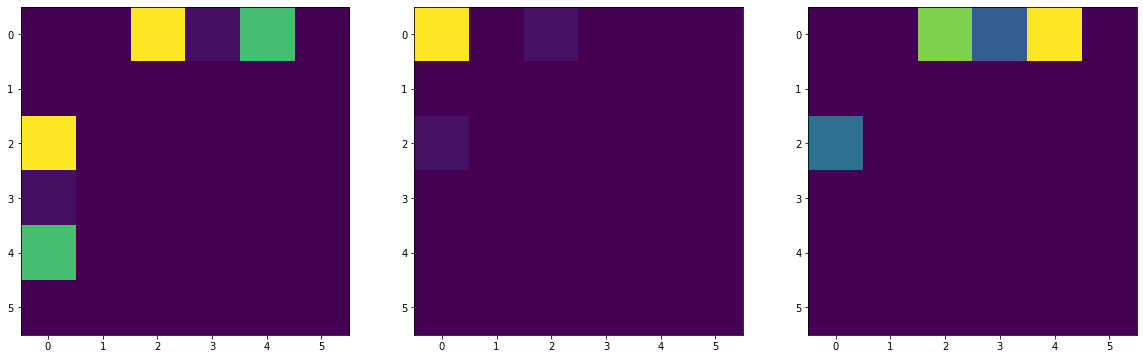

In [437]:
dt_results.loc[dt_results.r2.isna(), "r2"] = 0
plt.figure(figsize=(20, 8))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    M = np.array(dt_results.loc[dt_results.form == ls_forms[i], "r2"]).reshape((m, m))
    plt.imshow(M, vmin=r2_ndvi)


In [10]:
dt_results.loc[dt_results.r2 > r2_ndvi].sort_values(by="form")

,x0,x1,form,r2
0,0,2,a,0.220862
0,0,3,a,0.198422
0,0,4,a,0.214008
0,2,0,a,0.220862
0,3,0,a,0.198422
0,4,0,a,0.214008
1,0,0,b,0.230163
1,0,2,b,0.199044
1,2,0,b,0.199044
2,0,2,c,0.230562
